# Ejercicio N°6.1
**Boston Housing Prices**
El dataset contiene 506 observaciones de 14 variables y precios de venta de propiedades en la ciudad de Boston. El objetivo es conocer la influencia de cada variable y elaborar un modelo que prediga precios de venta.

https://github.com/manlio99/Materia-de-aprendizaje/tree/master/3_MidtermProjects/ProjectBHP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
#%matplotlib notebook

## 0. Carga de datos 

In [2]:
# 0. Carga de datos 
# -----------------------------------------------------------------------------
url_file = 'https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv';
df_Housing_Prices = pd.read_csv(url_file)

from IPython.display import display
# 1. Exploración inicial
# -----------------------------------------------------------------------------
df = df_Housing_Prices.copy();
display(df.info())
display(df.isnull().sum())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1.1. Datos faltantes
La proporción de datos faltantes no es baja. Por una cuestión de practicidad se quitarán esas observaciones.

In [3]:
# 1.1 Datos faltantes
# -----------------------------------------------------------------------------
dfismull = df[df.isnull().any(axis=1)]
print('Proporción de datos faltantes: {:3.2%}'.format(1*len(dfismull)/len(df)))#.format())
df_outnull = df.dropna(axis=0);
print(df_outnull.isna().sum());


Proporción de datos faltantes: 22.13%
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## 1.2. Analisis de correlación

- RAD y TAX presentan una alta correlación (+.90).
- CHAS presenta una muy baja correlación con todos los regresores.
- MEDV presenta mayor correlación con RM(+.72) y LSTAT(-.74) .Los restantes regresores presentan una correlación de 0.5 aproximadamente.
- Los regresores con mayor correlación ( | |> 0.5): INDUS(-.51), RM(+.72), TAX(+.50), PTRATIO(-.54) y LSTAT(-.74).

En la **sección 2.** se analizarán distintos métodos de regresión con el dataset completo, es decir con las 13 variables de regresión.

En la **sección 3.**, se analizarán los mismos métodos de regresión eliminando algunas variables de regresión. Como investigador, las variables de interés (basado en mi opinión subjetiva y/o la matriz de correlación) serán:

-- ['CRIM'(resulta interesante),'INDUS','TAX','PTRATIO'(resulta interesante),'LSTAT']

y por ende se quitaran:

-- [ 'ZN', 'CHAS', 'NOX', 'RM'(dejo LSTAT porque resulta mas interesante), 'AGE', 'DIS', 'RAD'(dejo TAX porque tiene mayor colleración con MEDV), 'B']


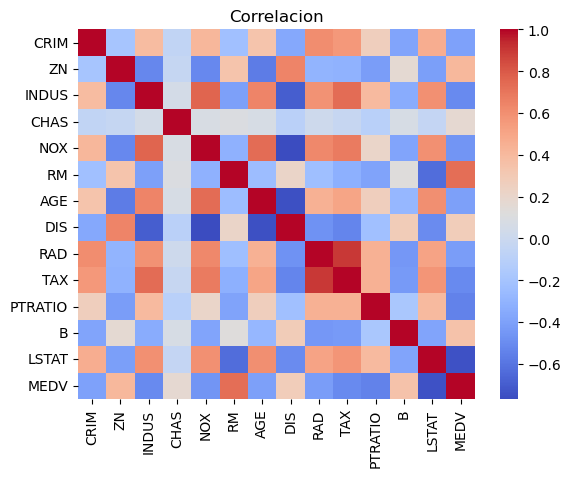

In [4]:
#%% 3. Analisis de correlación
df_num = df_outnull;
corr_matrix = df_num.corr()
fig,ax=plt.subplots();
sns.heatmap(corr_matrix,cmap='coolwarm',ax=ax)
ax.set_title('Correlacion');


## 1.3. Visualización de datos 

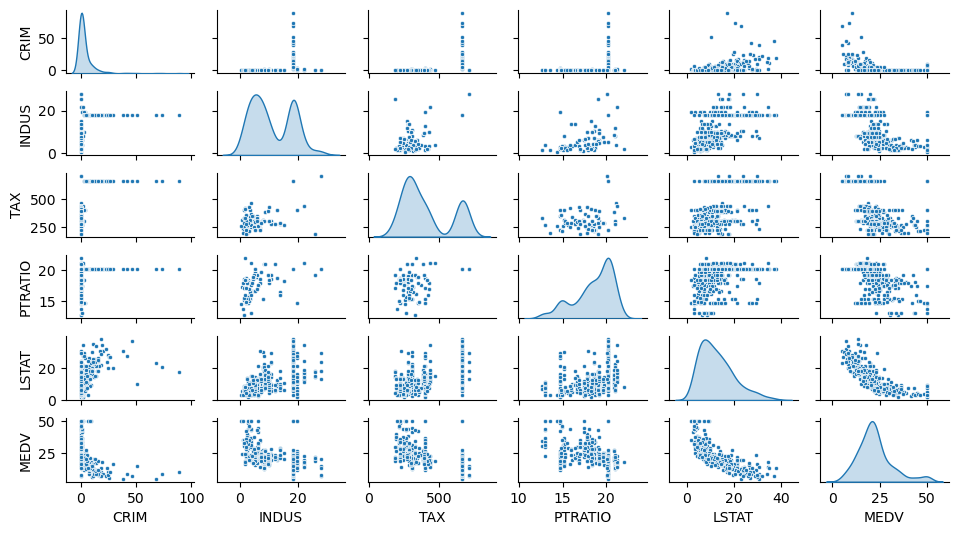

In [5]:
# 2. Visualizacion de datos 
dropout = [ 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B'];
target = 'MEDV';
sns.pairplot(df_outnull.drop(dropout,axis=1),markers='.',diag_kind='kde',height=.9,aspect=1.8)


## 1.3. Análisis de outliers
Se observan outliers en los predictores CRIM, ZN, PTRATIO, LSTAT y MEDV.
Se continua el trabajo sin quitar/tratar estas obervaciones para evaluar la robustez del ajuste de los modelos seleccionados.


<Axes: >

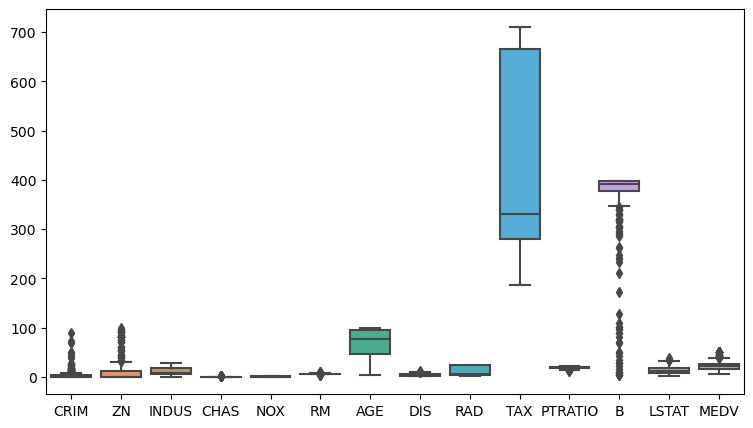

In [6]:
#%% C2. Análisis de outliers (curacion)
fig,ax=plt.subplots(figsize=(9, 5));
sns.boxplot(data = df_num,ax=ax)#,width=0.75)#,width=0.8, position=-1.5);


## 2.1. Preparación de los datos

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = df_num.copy()   #.drop(['Artist','Date'],axis=1)
target = 'MEDV';
X = df.drop(target,axis=1); 
y = df[target]; 

# Estandarización (media cero y variancia 1)
scaler = StandardScaler()
Xnorm = scaler.fit_transform(X)
#y = scaler.fit_transform( y.reshape((len(y),1)) ).reshape(len(y))
             
prop_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=prop_test_size, random_state = 0);
print('Son {} datos para entrenamiento y {} datos para prueba'.
      format(X_train.shape[0], X_test.shape[0]))


Son 315 datos para entrenamiento y 79 datos para prueba


## 2.2.1. Regresión - Modelo Lineal (sklearn)

In [8]:
# sklearn
# -----------------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

t1 = time.time();
rlineal = LinearRegression()
rlineal.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = rlineal.score(X_train, y_train)
score_test = rlineal.score(X_test, y_test)

#  coeficientes
bias = pd.Series(data=round(rlineal.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(rlineal.coef_,2),index = X.columns);

ALLcoef1 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef1)

stat = {'modelo': 'rLineal sklearn','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};
dfResultados = pd.DataFrame(stat)
ALLcoef = pd.DataFrame(ALLcoef1,columns=[stat['modelo']])

Bias y Coeficientes de regresión 
 bias       22.20
CRIM       -0.66
ZN          0.98
INDUS       0.45
CHAS        0.69
NOX        -2.24
RM          3.66
AGE        -0.67
DIS        -3.08
RAD         2.09
TAX        -2.33
PTRATIO    -1.94
B           0.93
LSTAT      -2.34
dtype: float64


## 2.2.2  Regresión - Modelo Lineal (statsmodels)

In [9]:
# statsmodels
# -----------------------------------------------------------------------------
import statsmodels.api as sm
# Ajustar el rlineal_statMo de regresión lineal
X_train_intercept = sm.add_constant(pd.DataFrame(X_train,columns = X.columns));
# X_train_intercept['intercept'] = np.ones((len(X_train),1));
X_test_intercept = sm.add_constant(pd.DataFrame(X_test,columns = X.columns));
# X_test_intercept['intercept'] = np.ones((len(X_test),1));

t1 = time.time();
rlineal_statM = sm.OLS( y_train.reset_index(drop=True), X_train_intercept).fit();
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = r2_score(rlineal_statM.predict(X_train_intercept),y_train)
score_test = r2_score(rlineal_statM.predict(X_test_intercept),y_test)



#  coeficientes
ALLcoef2 = rlineal_statM.params;
ind = ALLcoef2.index.tolist(); ind[0] = 'bias'; ALLcoef2.index = ind;

print('Bias y Coeficientes de regresión \n', ALLcoef2)

# Obtener un resumen de la regresión (similar al que devuelve R)
summary = rlineal_statM.summary()
print(summary)

stat = {"modelo": 'rLineal statsmodels','tiempo[ms]': [tiempoms],
        "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef2,columns=[stat['modelo']])),axis=1);


Bias y Coeficientes de regresión 
 bias       22.197290
CRIM       -0.658685
ZN          0.975622
INDUS       0.449057
CHAS        0.685184
NOX        -2.236158
RM          3.662042
AGE        -0.673989
DIS        -3.081169
RAD         2.086122
TAX        -2.325160
PTRATIO    -1.940189
B           0.926824
LSTAT      -2.335244
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     91.47
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           3.09e-96
Time:                        13:09:12   Log-Likelihood:                -898.22
No. Observations:                 315   AIC:                             1824.
Df Residuals:                     301   BIC:                             1877.
Df Model:               

## 2.3. Lasso

In [10]:
from sklearn.linear_model import Lasso, LassoCV
#from sklearn.linear_model import Ridge, RidgeCV
#from sklearn.linear_model import ElasticNet, ElasticNetCV
#from sklearn.preprocessing import normalize

t1 = time.time();
lasso_cv = LassoCV(cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)
print('Hiper alpha:{}'.format(round(lasso_cv.alpha_,4)))

# Instancia y ajuste del mejor modelo
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(lasso.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(lasso.coef_,2),index = X.columns);

ALLcoef3 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef3)

stat = {"modelo": 'rlineal lasso','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef3,columns=[stat['modelo']])),axis=1);

Hiper alpha:0.0516
Bias y Coeficientes de regresión 
 bias       22.20
CRIM       -0.48
ZN          0.79
INDUS       0.00
CHAS        0.70
NOX        -1.90
RM          3.70
AGE        -0.56
DIS        -2.76
RAD         1.25
TAX        -1.53
PTRATIO    -1.85
B           0.88
LSTAT      -2.34
dtype: float64


## 2.4. Ridge

In [11]:
from sklearn.linear_model import Ridge, RidgeCV
#from sklearn.linear_model import ElasticNet, ElasticNetCV
#from sklearn.preprocessing import normalize

alphas = np.random.uniform(0, 10, 50);
t1 = time.time();
ridge_cv = RidgeCV(alphas = alphas, cv = 10)#, normalize = True)
ridge_cv.fit(X_train, y_train)
print('Hiper alpha:{}'.format(round(ridge_cv.alpha_,4)))

# Instancia y ajuste del mejor modelo
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(ridge.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(ridge.coef_,2),index = X.columns);

ALLcoef4 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef4)

stat = {"modelo": 'rlineal ridge','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef4,columns=[stat['modelo']])),axis=1);

Hiper alpha:9.9646
Bias y Coeficientes de regresión 
 bias       22.20
CRIM       -0.55
ZN          0.83
INDUS       0.14
CHAS        0.72
NOX        -1.86
RM          3.64
AGE        -0.62
DIS        -2.70
RAD         1.40
TAX        -1.69
PTRATIO    -1.86
B           0.90
LSTAT      -2.33
dtype: float64


## 2.5. ElasticNet

In [12]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

t1 = time.time();
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)#, normalize = True)
elastic_net_cv.fit(X_train, y_train)

print('Hiper alpha:{}'.format(round(elastic_net_cv.alpha_,4)))
print('Hiper ratio:{}'.format(round(elastic_net_cv.l1_ratio,4)))

# Instancia y ajuste del mejor modelo
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = elastic_net.score(X_train, y_train)
score_test = elastic_net.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(elastic_net.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(elastic_net.coef_,2),index = X.columns);

ALLcoef5 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef5)

stat = {"modelo": 'rlineal elasticnet','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef5,columns=[stat['modelo']])),axis=1);


Hiper alpha:0.0513
Hiper ratio:0.5
Bias y Coeficientes de regresión 
 bias       22.20
CRIM       -0.49
ZN          0.78
INDUS       0.00
CHAS        0.72
NOX        -1.77
RM          3.66
AGE        -0.57
DIS        -2.63
RAD         1.19
TAX        -1.49
PTRATIO    -1.83
B           0.88
LSTAT      -2.33
dtype: float64


## 2.6.1. Resultados
- En la **primer tabla**, puede verse que los tres modelos de regresión presentan un comportamiento similar al procesar el dataset completo (con todos los regresores y solamente quitando las observaciones con datos faltantes).
- En la **segunda tabla** de los coeficientes, se verifica que los bias en los 4 modelos es el mismo (np.mean(df['MEDV'])).
Se observa como Lasso considera irrelevante el regresor INDUS, al tener un coeficiente nulo.


In [13]:
display(dfResultados) 
display(ALLcoef)

,modelo,tiempo[ms],score_train(r^2),score_test(r^2)
0,rLineal sklearn,1.995,0.797996,0.580656
1,rLineal statsmodels,0.000,0.746861,0.395335
2,rlineal lasso,98.294,0.796098,0.576732
3,rlineal ridge,859.509,0.796442,0.581567
4,rlineal elasticnet,105.144,0.795472,0.579428


,rLineal sklearn,rLineal statsmodels,rlineal lasso,rlineal ridge,rlineal elasticnet
bias,22.20,22.197290,22.20,22.20,22.20
CRIM,-0.66,-0.658685,-0.48,-0.55,-0.49
ZN,0.98,0.975622,0.79,0.83,0.78
INDUS,0.45,0.449057,0.00,0.14,0.00
CHAS,0.69,0.685184,0.70,0.72,0.72
NOX,-2.24,-2.236158,-1.90,-1.86,-1.77
RM,3.66,3.662042,3.70,3.64,3.66
AGE,-0.67,-0.673989,-0.56,-0.62,-0.57
DIS,-3.08,-3.081169,-2.76,-2.70,-2.63
RAD,2.09,2.086122,1.25,1.40,1.19


## 2.6.2. Plots 

- La grafica y_tets vs y_pred muestra la diferencia entre los modelos ajustados.

- Finalmente la última grafica muestra la evolución de los coeficientes ajustados para los modelos de Lasso, Ridge y ElasticNet respecto del parámetro \alpha.


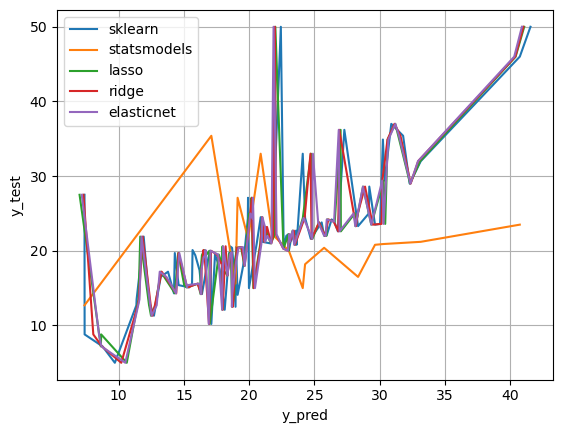

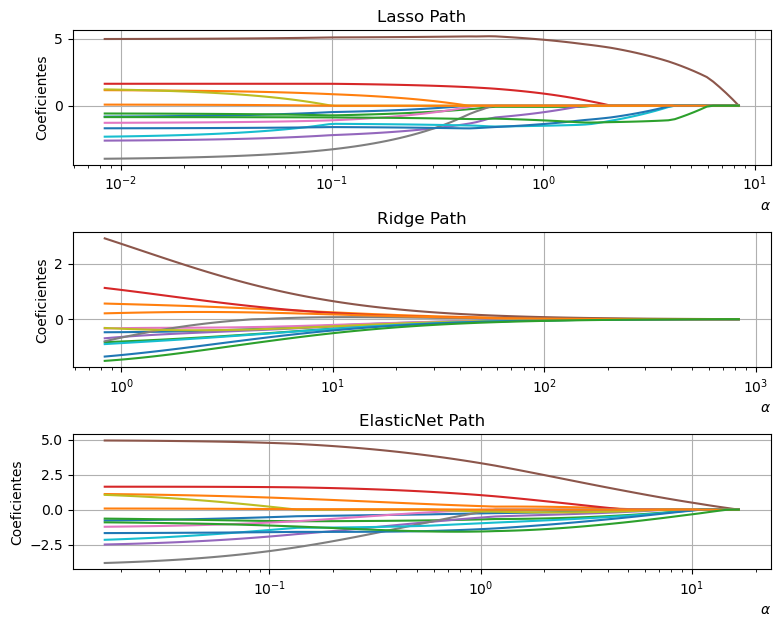

In [14]:
_,ax = plt.subplots(); ax.grid();
sns.lineplot(x=rlineal.predict(X_test),y=y_test,label='sklearn')
sns.lineplot(x=rlineal_statM.predict(X_test_intercept),y=y_test,label='statsmodels')
sns.lineplot(x=lasso.predict(X_test),y=y_test,label='lasso')
sns.lineplot(x=ridge.predict(X_test),y=y_test,label='ridge')
sns.lineplot(x=elastic_net.predict(X_test),y=y_test,label='elasticnet')
ax.set_xlabel('y_pred'); ax.set_ylabel('y_test'); 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Trayectoria de los coeficientes
# ----------------------------------------------------------------------------- 
from sklearn.linear_model import enet_path

fig = plt.figure(num=5,figsize=(9, 7)); fig.clf();
plt.subplots_adjust(hspace=0.5)

# lasso
alfa, coefsL, _ = enet_path(X_train, y_train,l1_ratio=0.99);
ax1 = fig.add_subplot(3, 1, 1); ax1.grid();
ax1.plot(alfa, coefsL.T, label='Lasso')
ax1.set_xscale("log"); ax1.set_xlabel(r'$\alpha$',loc='right');
ax1.set_ylabel("Coeficientes"); ax1.set_title("Lasso Path")

# Rige
ax2 = fig.add_subplot(3, 1, 2); ax2.grid();
alfa, coefsR, _ = enet_path(X_train, y_train,l1_ratio=0.01);
ax2.plot(alfa, coefsR.T, label='Ridge')
ax2.set_xscale("log"); ax2.set_xlabel(r'$\alpha$',loc='right');
ax2.set_ylabel("Coeficientes"); ax2.set_title("Ridge Path");

# ElasticNet
ax3 = fig.add_subplot(3, 1, 3); ax3.grid();
alfa, coefsE, _ = enet_path(X_train, y_train,l1_ratio=0.5);
ax3.plot(alfa, coefsE.T, label='ElasticNet')
ax3.set_xscale("log"); ax3.set_xlabel(r'$\alpha$',loc='right');
ax3.set_ylabel("Coeficientes"); ax3.set_title("ElasticNet Path");

## 3.1 Preparación de los datos
Respecto del dataset inicial se eliminan las  variables de regresión,
dropout = [ 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B'];
Por no considerarlas como variables de interés… basado en mi opinión subjetiva y/o en la matriz de correlación de la sección 1.2.


In [15]:
#  Preparacion de los datos
# -----------------------------------------------------------------------------
# dropout = [ 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B']; #,'CRIM','INDUS'];
df = df_outnull.drop(dropout,axis=1);
X = df.drop(target,axis=1); 
y = df[target]; 

# Estandarización (media cero y variancia 1)
scaler = StandardScaler()
Xnorm = scaler.fit_transform(X)
             
prop_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(Xnorm, y, test_size=prop_test_size, random_state = 0);
print('Son {} datos para entrenamiento y {} datos para prueba'.
      format(X_train.shape[0], X_test.shape[0]))


Son 315 datos para entrenamiento y 79 datos para prueba


## 3.2 Ajuste de los modelos de regresión lineal, Lasso, Ridge y ElasticNet

In [16]:
# =============================================================================
# Regresión - Modelo Lineal sklearn
# =============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

t1 = time.time();
rlineal = LinearRegression()
rlineal.fit(X_train, y_train)
t2 = time.time();
tiempoms = 1000*round(t2-t1,6);
score_train = rlineal.score(X_train, y_train)
score_test = rlineal.score(X_test, y_test)
#  coeficientes
bias = pd.Series(data=round(rlineal.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(rlineal.coef_,2),index = X.columns);
ALLcoef1 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef1)
stat = {'modelo': 'rLineal sklearn','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};
dfResultados = pd.DataFrame(stat)
ALLcoef = pd.DataFrame(ALLcoef1,columns=[stat['modelo']])

# ============================================================================,=
# Regresión - Modelo Lasso
# =============================================================================
from sklearn.linear_model import Lasso, LassoCV

log_alfas = np.logspace(2,-2,num=100);
t1 = time.time();
lasso_cv = LassoCV(cv = 10)
lasso_cv.fit(X_train, y_train)
print('Hiper alpha:{}'.format(round(lasso_cv.alpha_,4)))

# Instancia y ajuste del mejor modelo
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(lasso.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(lasso.coef_,2),index = X.columns);

ALLcoef3 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef3)

stat = {"modelo": 'rlineal lasso','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef3,columns=[stat['modelo']])),axis=1);

# ============================================================================,=
# Regresión - Modelo Ridge
# =============================================================================
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50);
t1 = time.time();
ridge_cv = RidgeCV(alphas = alphas, cv = 10)#, normalize = True)
ridge_cv.fit(X_train, y_train)
print('Hiper alpha:{}'.format(round(ridge_cv.alpha_,4)))

# Instancia y ajuste del mejor modelo
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(ridge.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(ridge.coef_,2),index = X.columns);

ALLcoef4 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef4)

stat = {"modelo": 'rlineal ridge','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef4,columns=[stat['modelo']])),axis=1);

# ============================================================================,=
# Regresión - Modelo ElasticNet
# =============================================================================
from sklearn.linear_model import ElasticNet, ElasticNetCV

t1 = time.time();
elastic_net_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)#, normalize = True)
elastic_net_cv.fit(X_train, y_train)

print('Hiper alpha:{}'.format(round(elastic_net_cv.alpha_,4)))
print('Hiper ratio:{}'.format(round(elastic_net_cv.l1_ratio,4)))

# Instancia y ajuste del mejor modelo
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)
t2 = time.time();

tiempoms = 1000*round(t2-t1,6);
score_train = elastic_net.score(X_train, y_train)
score_test = elastic_net.score(X_test, y_test)
     
#  coeficientes
bias = pd.Series(data=round(elastic_net.intercept_,2),index =['bias']);
coef = pd.Series(data=np.round(elastic_net.coef_,2),index = X.columns);

ALLcoef5 = pd.concat((bias,coef),axis=0);
print('Bias y Coeficientes de regresión \n', ALLcoef5)

stat = {"modelo": 'rlineal elasticnet','tiempo[ms]': [tiempoms],
             "score_train(r^2)": [score_train], "score_test(r^2)": [score_test]};

dfResultados = dfResultados.append(pd.DataFrame(stat),ignore_index=True)
ALLcoef = pd.concat((ALLcoef,pd.DataFrame(ALLcoef5,columns=[stat['modelo']])),axis=1);


Bias y Coeficientes de regresión 
 bias       22.39
CRIM        0.03
INDUS       0.08
TAX        -0.54
PTRATIO    -2.63
LSTAT      -5.47
dtype: float64
Hiper alpha:0.1438
Bias y Coeficientes de regresión 
 bias       22.39
CRIM       -0.00
INDUS      -0.00
TAX        -0.41
PTRATIO    -2.54
LSTAT      -5.38
dtype: float64
Hiper alpha:9.9603
Bias y Coeficientes de regresión 
 bias       22.39
CRIM       -0.06
INDUS      -0.06
TAX        -0.56
PTRATIO    -2.58
LSTAT      -5.21
dtype: float64
Hiper alpha:0.101
Hiper ratio:0.5
Bias y Coeficientes de regresión 
 bias       22.39
CRIM       -0.07
INDUS      -0.11
TAX        -0.57
PTRATIO    -2.52
LSTAT      -5.05
dtype: float64


## 3.3. Resultados
En esta última prueba, los modelos nuevamente presentan un comportamiento similar. Se observa (para todos los modelos) que el score r^2 obtenido sobre los datos de entrenamiento es aprox.  **0.63** por debajo del obtenido (0.79) al trabajar el data completo con todos los regresores.

Se observó sin embargo que el score r^2 en los datos de test prácticamente no sufrió cambios.



In [17]:
display(dfResultados) 
display(ALLcoef) 

,modelo,tiempo[ms],score_train(r^2),score_test(r^2)
0,rLineal sklearn,1.995,0.634393,0.584374
1,rlineal lasso,75.834,0.634000,0.587393
2,rlineal ridge,825.095,0.633852,0.585437
3,rlineal elasticnet,103.264,0.632913,0.584417


,rLineal sklearn,rlineal lasso,rlineal ridge,rlineal elasticnet
bias,22.39,22.39,22.39,22.39
CRIM,0.03,-0.00,-0.06,-0.07
INDUS,0.08,-0.00,-0.06,-0.11
TAX,-0.54,-0.41,-0.56,-0.57
PTRATIO,-2.63,-2.54,-2.58,-2.52
LSTAT,-5.47,-5.38,-5.21,-5.05


## 3.4 Plots

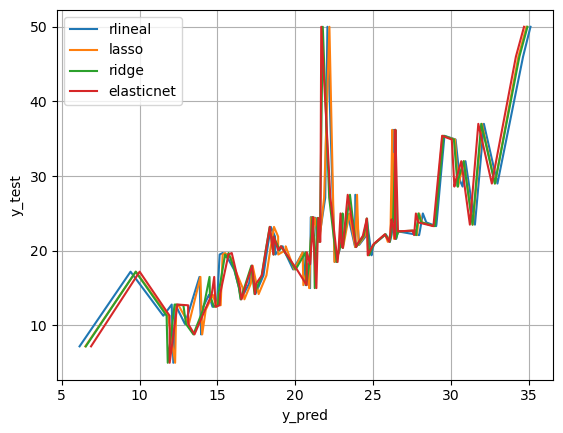

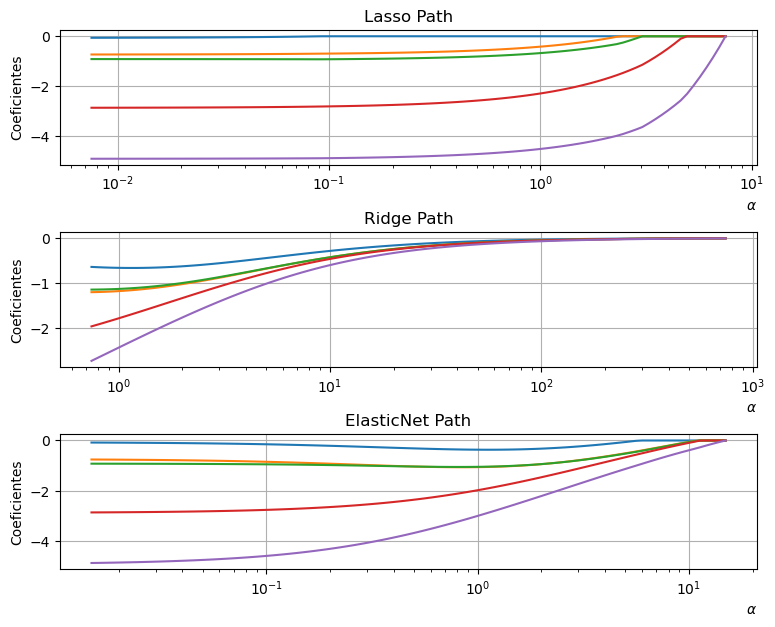

In [18]:
#% Plots y Resultados
# -----------------------------------------------------------------------------
_,ax = plt.subplots(); ax.grid();
sns.lineplot(x=rlineal.predict(X_test),y=y_test,label='rlineal')
sns.lineplot(x=lasso.predict(X_test),y=y_test,label='lasso')
sns.lineplot(x=ridge.predict(X_test),y=y_test,label='ridge')
sns.lineplot(x=elastic_net.predict(X_test),y=y_test,label='elasticnet')
ax.set_xlabel('y_pred'); ax.set_ylabel('y_test'); 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Trayectoria de los coeficientes
# ----------------------------------------------------------------------------- 
from sklearn.linear_model import enet_path

fig = plt.figure(num=5,figsize=(9, 7)); fig.clf();
plt.subplots_adjust(hspace=0.5)

# lasso
alfa, coefsL, _ = enet_path(X_train, y_train,l1_ratio=0.99);
ax1 = fig.add_subplot(3, 1, 1); ax1.grid();
ax1.plot(alfa, coefsL.T, label='Lasso')
ax1.set_xscale("log"); ax1.set_xlabel(r'$\alpha$',loc='right');
ax1.set_ylabel("Coeficientes"); ax1.set_title("Lasso Path")

# Rige
ax2 = fig.add_subplot(3, 1, 2); ax2.grid();
alfa, coefsR, _ = enet_path(X_train, y_train,l1_ratio=0.01);
ax2.plot(alfa, coefsR.T, label='Ridge')
ax2.set_xscale("log"); ax2.set_xlabel(r'$\alpha$',loc='right');
ax2.set_ylabel("Coeficientes"); ax2.set_title("Ridge Path");

# ElasticNet
ax3 = fig.add_subplot(3, 1, 3); ax3.grid();
alfa, coefsE, _ = enet_path(X_train, y_train,l1_ratio=0.5);
ax3.plot(alfa, coefsE.T, label='ElasticNet')
ax3.set_xscale("log"); ax3.set_xlabel(r'$\alpha$',loc='right');
ax3.set_ylabel("Coeficientes"); ax3.set_title("ElasticNet Path");

## 4. Una prueba mas...
Para jugar un poquito más se realizó una última prueba similar a la sección 3., pero eliminando también las características CRIM e INNDUS, es decir que respecto del dataset inicial se eliminan las  variables de regresión,
dropout = [ 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'B', ‘CRIM’, ‘INNDUS’].

Los resultados obtenidos prácticamente fueron los mismos.


In [28]:
#display(dfResultados); display(ALLcoef) 

,modelo,tiempo[ms],score_train(r^2),score_test(r^2)
0,rLineal sklearn,1.894,0.634358,0.586526
1,rlineal lasso,98.661,0.634329,0.586855
2,rlineal ridge,856.038,0.633951,0.583014
3,rlineal elasticnet,105.601,0.634186,0.584691


,rLineal sklearn,rlineal lasso,rlineal ridge,rlineal elasticnet
bias,22.39,22.39,22.39,22.39
TAX,-0.48,-0.46,-0.61,-0.55
PTRATIO,-2.63,-2.60,-2.58,-2.59
LSTAT,-5.44,-5.42,-5.23,-5.31
